In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Life Expectancy (WHO)

This study aims to enhance the understanding of factors influencing life expectancy. Dataset consists of data from a period of 2000 to 2015. Columns are related to: immunization, mortality, economic, social, and other health-related factors.

Some feature descriptions:
<li>Life expectancy - Life Expectancy in age</li>
<li>Adult mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)</li>
<li>Infant deaths - Number of Infant Deaths per 1000 population</li>
<li>Alcohol - recorded per capita (15+) consumption (in litres of pure alcohol)</li>
<li>Percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)</li>
<li>Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)</li>
<li>Measles - number of reported cases per 1000 population</li>


In [170]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Dropping rows with null values

In [172]:
df.dropna(inplace=True)

### Removing extra whitespaces from column names

In [173]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [174]:
strip_column_names = lambda name: name.strip()
df.rename(columns=strip_column_names, inplace=True)

In [175]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Distribution of life expectancy

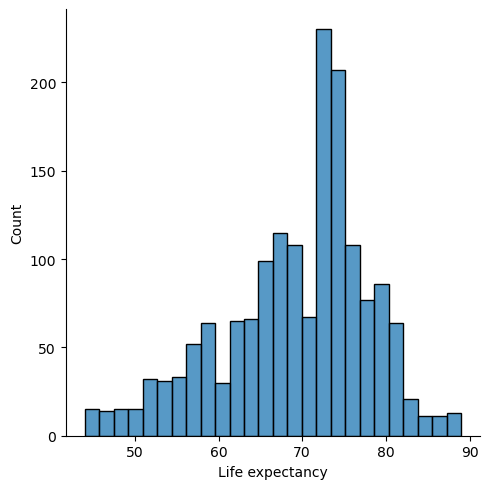

In [176]:
sns.displot(df['Life expectancy']);

## Developed vs developing countries


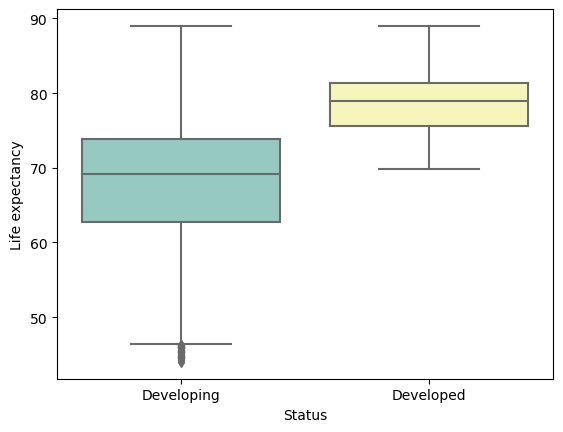

In [177]:
sns.boxplot(data=df, x='Status', y='Life expectancy', palette='Set3');

## Correlation between life expectancy and other variables

In [178]:
chart_data = df.iloc[:, 3:].corr()['Life expectancy'].reset_index().sort_values('Life expectancy', ascending=False)
chart_data

,index,Life expectancy
0,Life expectancy,1.000000
18,Schooling,0.727630
17,Income composition of resources,0.721083
7,BMI,0.542042
13,GDP,0.441322
4,percentage expenditure,0.409631
3,Alcohol,0.402718
11,Diphtheria,0.341331
9,Polio,0.327294
5,Hepatitis B,0.199935


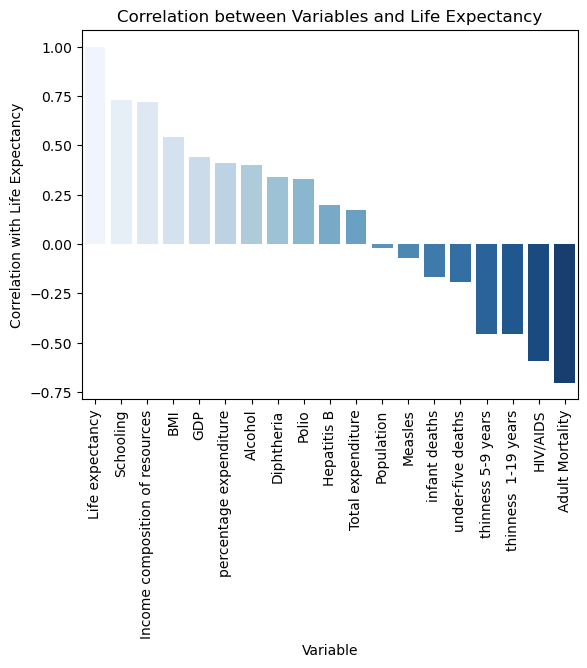

In [179]:
ax = sns.barplot(data=chart_data, x='index', y='Life expectancy', palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation with Life Expectancy')
plt.title('Correlation between Variables and Life Expectancy');

Schooling is strongly correlated with life expectancy, so I will use it for linear regression

# Assignment 2

In [180]:
X = df['Schooling'].values.reshape(-1,1)[:1000]
y = df['Life expectancy'].values.reshape(-1)[:1000]
X_range = np.linspace(min(X), max(X), 1000)

## Creating simple regression model

In [181]:
model = LinearRegression() 
model.fit(X, y)

LinearRegression()

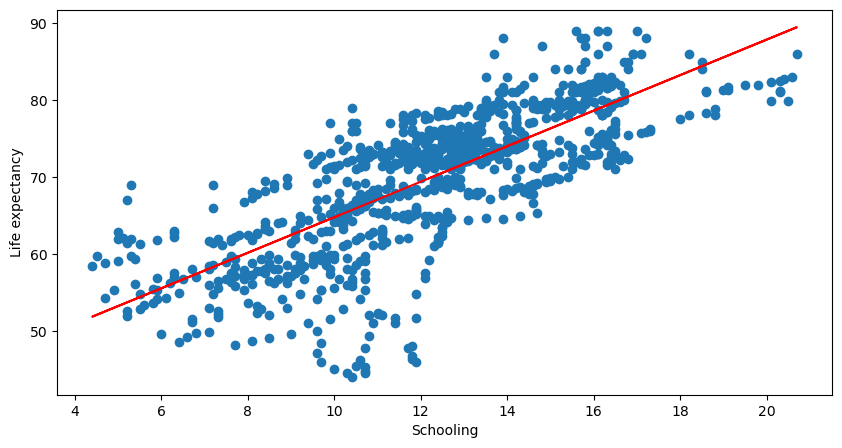

In [182]:
y_predicted = model.predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, y_predicted, color='r')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy');

In [183]:
print(f'model intercept: {model.intercept_}')
print(f'model slope: {model.coef_}')
print(f'model score: {model.score(X, y)}')
print('Mean squared error equals:',mean_squared_error(y, (X*model.coef_ + model.intercept_)))

model intercept: 41.71663898557365
model slope: [2.30637981]
model score: 0.5795877741812707
Mean squared error equals: 33.88630890419446


##  Creating higher order polynomial regression models

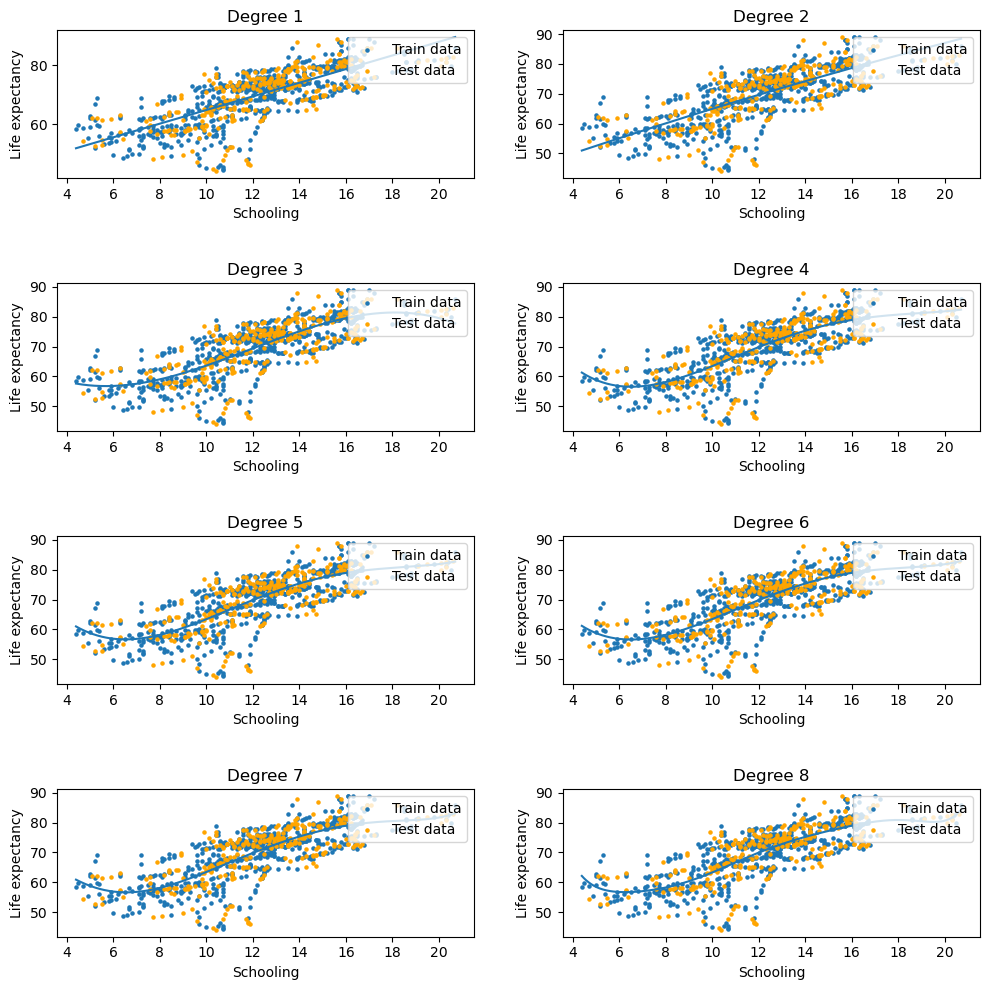

In [184]:
#a)

errors_train = []
errors_test = []
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for order in range(1,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    poly = PolynomialFeatures(order, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    
    y_predicted = sum([poly_model.coef_[i] * X_range**(i + 1) for i in range(order)]) + poly_model.intercept_
    errors_train.append(mean_squared_error(y_train, poly_model.predict(X_train_poly)))
    errors_test.append(mean_squared_error(y_test, poly_model.predict(X_test_poly)))
    
    row = (order - 1) // 2
    col = (order - 1) % 2
    
    axs[row, col].scatter(X_train, y_train, s=5, label='Train data')
    axs[row, col].scatter(X_test, y_test, s=5, color='orange', label='Test data')
    axs[row, col].plot(X_range, y_predicted)
    axs[row, col].set_xlabel('Schooling')
    axs[row, col].set_ylabel('Life expectancy')
    axs[row, col].set_title(f'Degree {order}')
    axs[row, col].legend(loc='upper right')
    
plt.tight_layout(h_pad=3.0, w_pad=3.0)

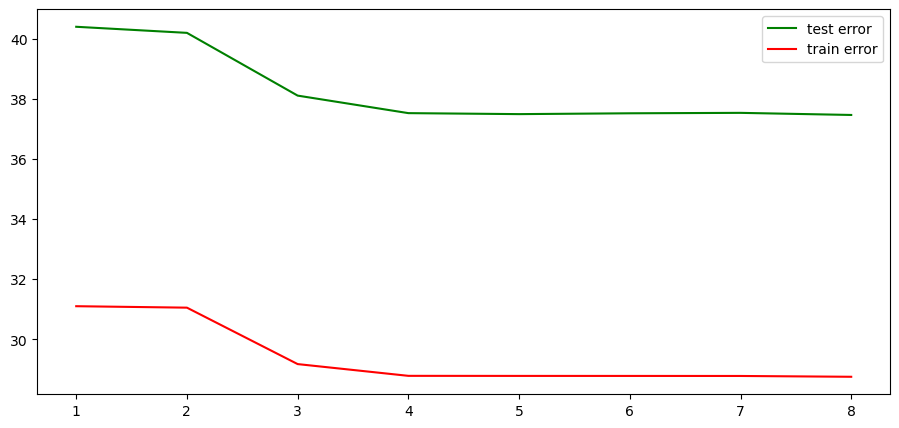

In [185]:
degrees = np.arange(1, 9)
plt.figure(figsize=(11,5))
plt.plot(degrees, errors_test, color='g', label='test error')
plt.plot(degrees, errors_train, color='r', label='train error')
plt.legend();

After 4th degree error values stop changing.

## Training my model to predict Schooling based on life expectancy

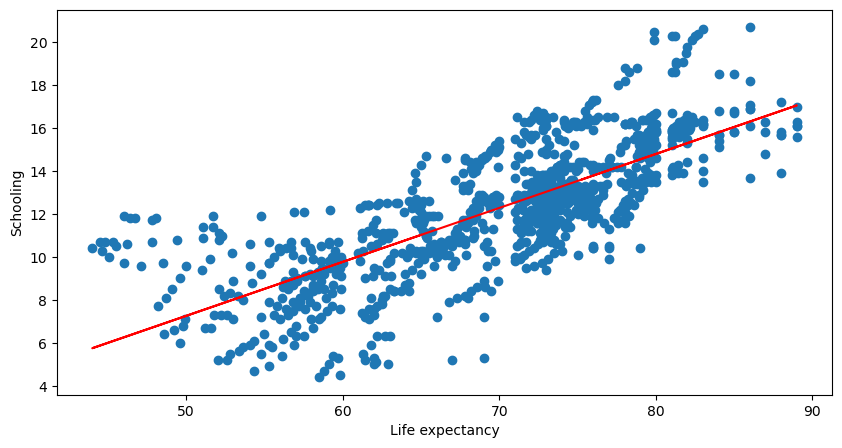

In [186]:
X = df['Life expectancy'].values.reshape(-1,1)[:1000]
y = df['Schooling'].values.reshape(-1)[:1000]
model = LinearRegression() 
model.fit(X, y)
y_predicted = model.predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, y_predicted, color='r')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling');

## Adding more features to my model

In [187]:
def poly_model(X, y):    
    poly = PolynomialFeatures(3, include_bias = False)
    X = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

    model = LinearRegression() 
    _= model.fit(X_train, y_train) 

    y_pred = model.predict(X_test)
    error = mean_squared_error(y_pred, y_test)
    score = model.score(X_test, y_test)
    
    print(f"Mean squared error equals: {error}")
    print(f"Model score error equals: {score}")

In [188]:
X = df[['Adult Mortality', 'Schooling', 'Income composition of resources']].values.reshape(-1,3)
y = df['Life expectancy'].values.reshape(-1)
poly_model(X, y)

Mean squared error equals: 9.941618833645965
Model score error equals: 0.8734247699913742


## Assignment 3

In [189]:
X = df['Schooling'].values.reshape(-1,1)[:1000]
y = df['Life expectancy'].values.reshape(-1,1)[:1000]
print(np.shape(X))
print(np.shape(y))

(1000, 1)
(1000, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

In [190]:
def predict(b, X):
    return np.dot(X, b)

def cost(y_pred, y_true):
    return (np.linalg.norm(y_pred - y_true)**2)/len(y_pred)

5.515515515515515 129.1680160003447


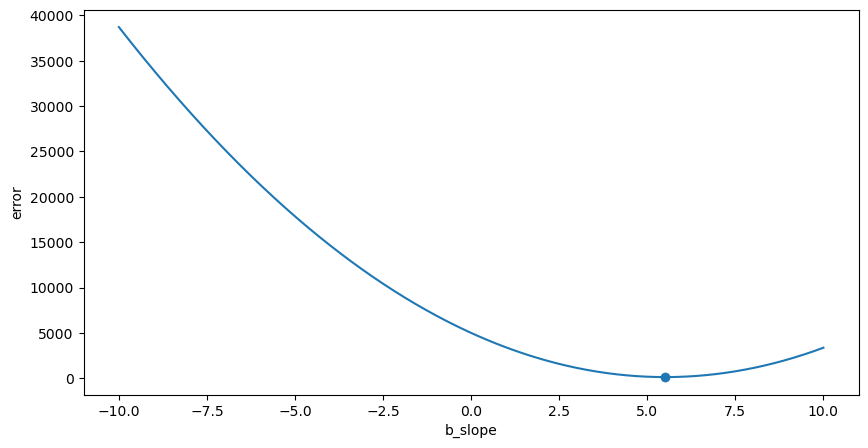

In [191]:
b = np.linspace(-10, 10, 1000)
res = [cost(predict(b_val, X), y) for b_val in b]
m = np.argmin(res)
x_min = b[m]
y_min = res[m]
plt.figure(figsize=(10,5))
plt.plot(b, res)
plt.xlabel('b_slope')
plt.ylabel('error')
plt.scatter(x_min, y_min);
print(x_min, y_min)

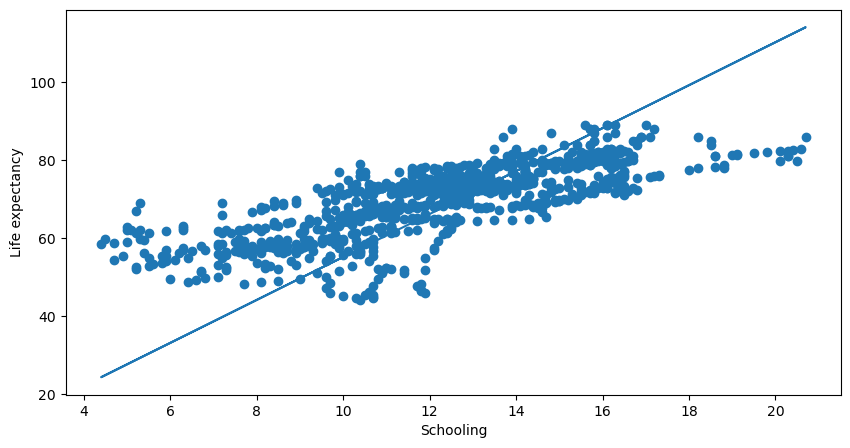

In [192]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, predict(X, x_min))
plt.ylabel('Life expectancy')
plt.xlabel('Schooling');

The issue is that our plot needs to cross point (0,0). We should add bias column to remove this constrain.

## Adding bias column

In [193]:
X = np.concatenate([X,np.ones((1000, 1))], axis=1)

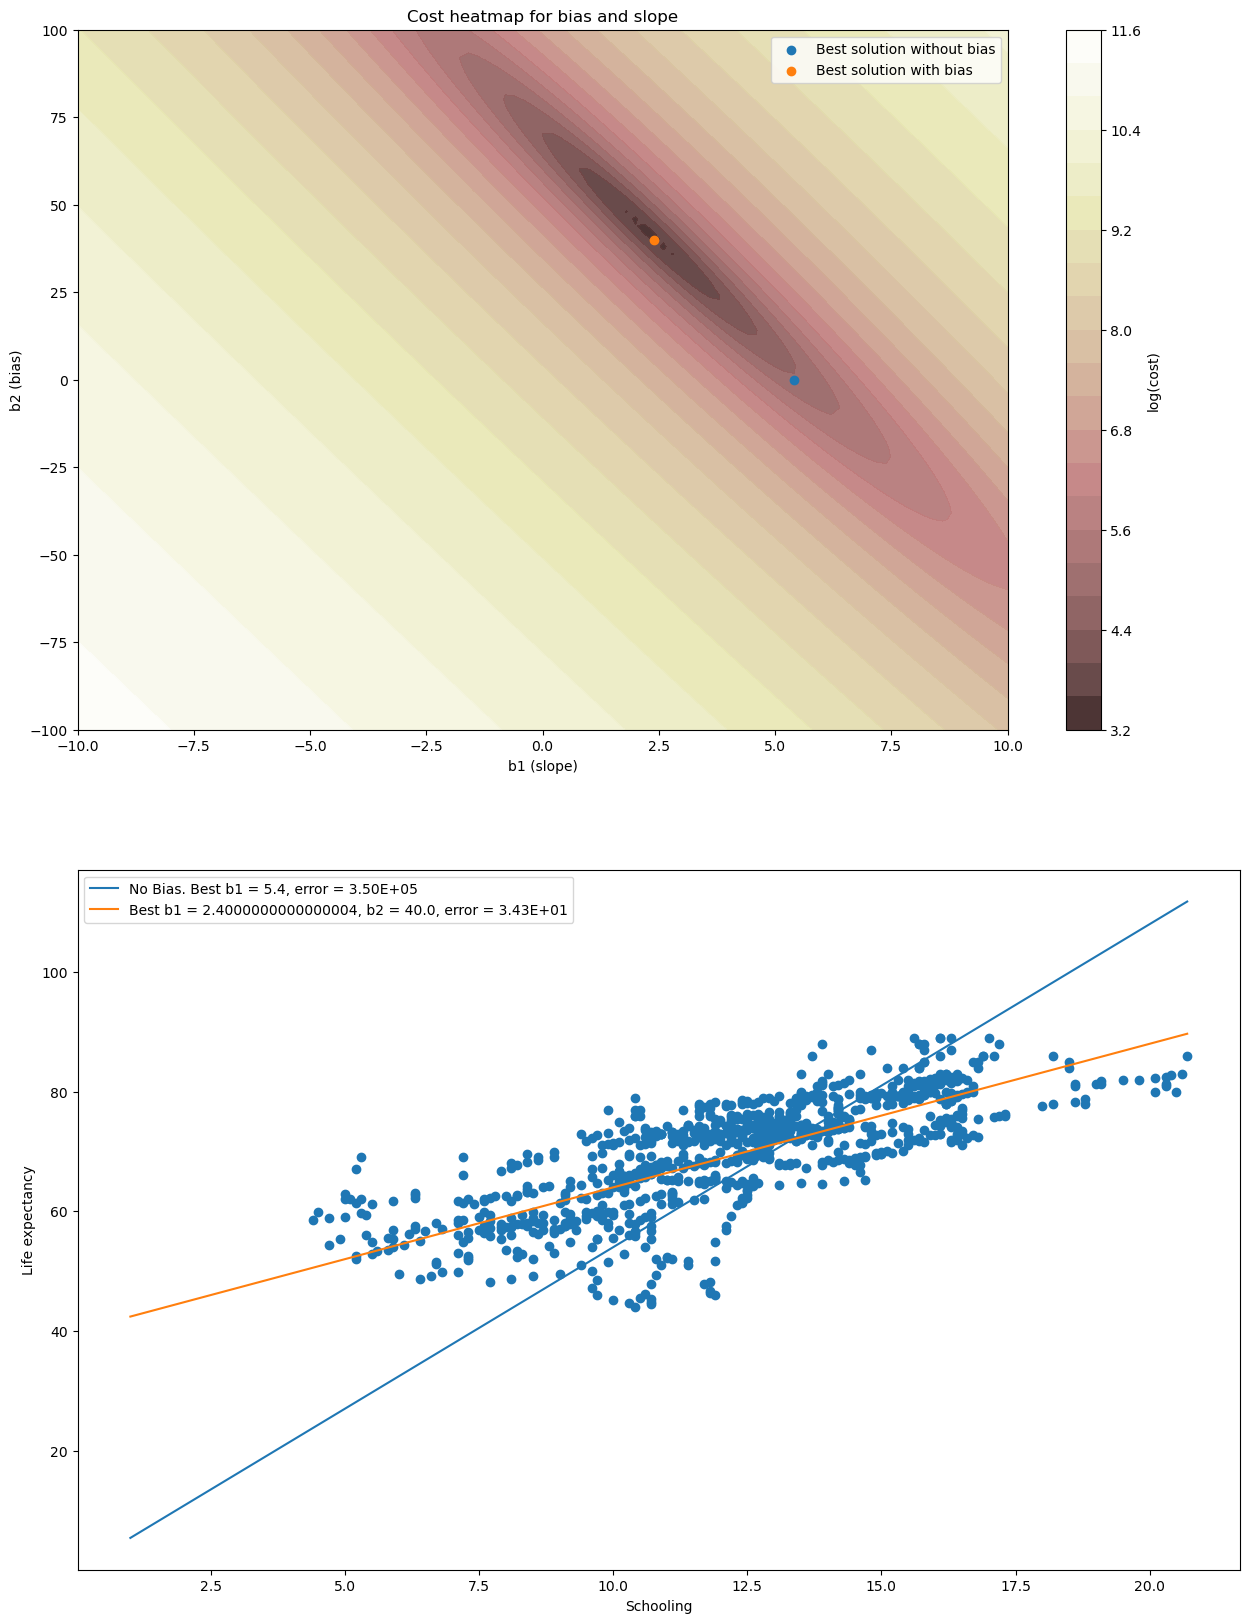

In [194]:
#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-10, 10, num=201)]
cost_arr = [cost(predict(b, X[:,0]), y) for b in b_arr]
best_b = b_arr[np.argmin(cost_arr)]


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-10, 10, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-100, 100, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b, 0, label = "Best solution without bias")
plt.scatter(best_b1, best_b2, label = "Best solution with bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y)
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b, cost_arr[np.argmin(cost_arr)]))


y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

### Adding bias improved algorithm by 4 orders of magnitude

## Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$


In [195]:
def standardize(X):
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    return (X-m)/ s, m, s


def destandardize(X, means, sds):
    return X*sds+means

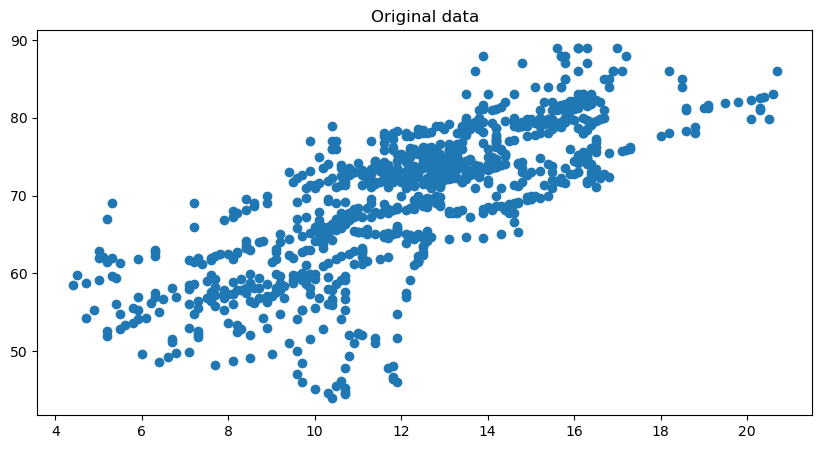

In [196]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], y)
plt.title('Original data');

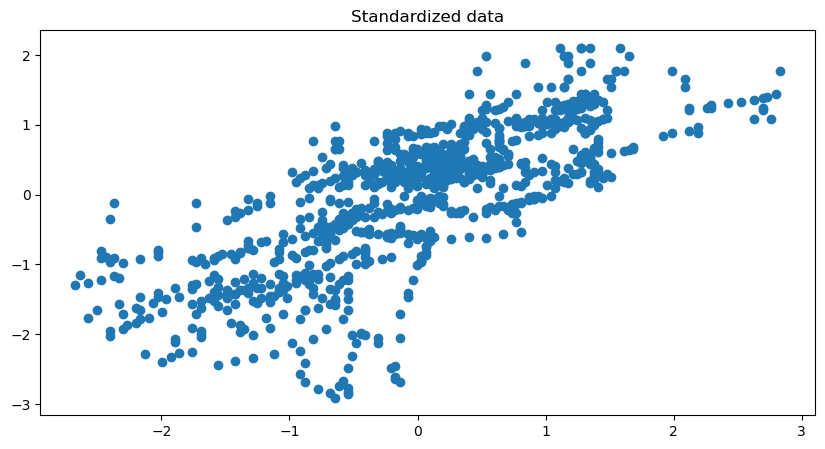

In [197]:
plt.figure(figsize=(10, 5))
yaxis, my, sy = standardize(y)
xaxis, mx, sx = standardize(X[:, 0])
plt.scatter(xaxis, yaxis)
plt.title('Standardized data');

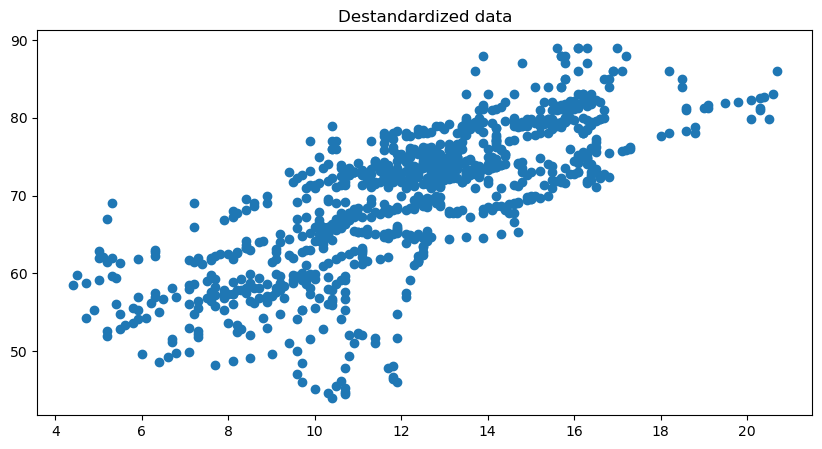

In [198]:
plt.figure(figsize=(10, 5))
plt.scatter(destandardize(xaxis, mx, sx), destandardize(yaxis, my, sy))
plt.title('Destandardized data');

## Gradient Descent
In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have


In [199]:
def gradient(b, X, y):
    return (np.dot(2*X.T, (np.dot(X, b)-y)))/len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b, X, y)*lr

In [200]:
#b)
def gradient_descend(b1, b2, b, X, y, lr, max_iter):
    b_x, b_y = np.meshgrid(b1, b2) 
    cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) 

    for i in range(nb_of_bs):
        for j in range(nb_of_bs):
            cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)

    plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)

    steps = [b]
    for i in range(max_iter):
        b_prev = b
        b = gradient_descent_step(b, X, y, lr)
        if np.abs(np.linalg.norm(b) - np.linalg.norm(b_prev)) < 0.002:
            break
        steps.append(b)
        
    print(f'lr: {lr}, steps: {len(steps)}')

    steps = np.array(steps)
    plt.plot(steps[:,0], steps[:, 1], marker='.', label=f'lr: {lr}')
    
    plt.legend();


lr: 0.35, steps: 7
lr: 0.2, steps: 13
lr: 0.05, steps: 46


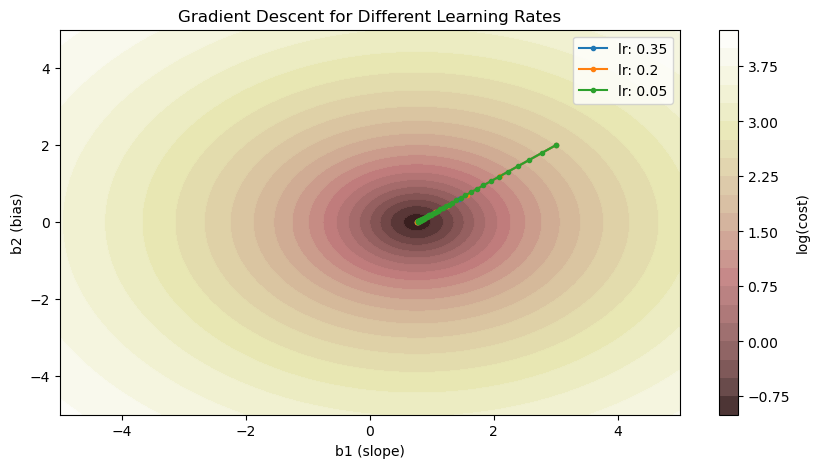

In [201]:
nb_of_bs = 101 
b1 = np.linspace(-5,5, num=nb_of_bs) 
b2 = np.linspace(-5,5, num=nb_of_bs) 
X_standardized, x_mean, x_std = standardize(X[:,0])
y_standardized, y_mean, y_std = standardize(y)
Xs = np.column_stack((X_standardized, X[:,1]))

plt.figure(figsize=(10, 5))

gradient_descend(b1, b2,np.array([3,2]).reshape(2,1), Xs, y_standardized, 0.35, 100)
gradient_descend(b1, b2,np.array([3,2]).reshape(2,1), Xs, y_standardized, 0.2, 100)
gradient_descend(b1, b2,np.array([3,2]).reshape(2,1), Xs, y_standardized, 0.05, 100)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent for Different Learning Rates")
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)");

lr: 0.35, steps: 7
lr: 0.2, steps: 14
lr: 0.05, steps: 31


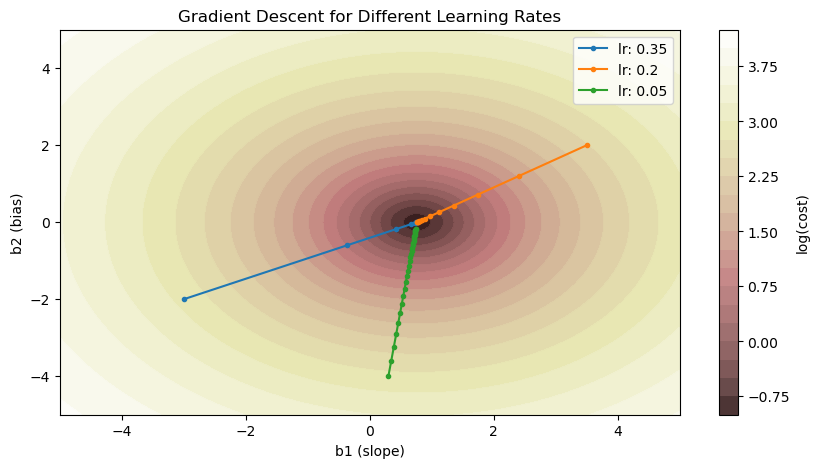

In [202]:
plt.figure(figsize=(10, 5))

gradient_descend(b1, b2,np.array([-3,-2]).reshape(2,1), Xs, y_standardized, 0.35, 100)
gradient_descend(b1, b2,np.array([3.5,2]).reshape(2,1), Xs, y_standardized, 0.2, 100)
gradient_descend(b1, b2,np.array([0.3,-4]).reshape(2,1), Xs, y_standardized, 0.05, 100)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent for Different Learning Rates")
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)");

Adult mortality was also strongly correlated with life expectancy, so now I am using it as a bias column

lr: 0.2, steps: 18
lr: 0.5, steps: 12
lr: 0.35, steps: 4


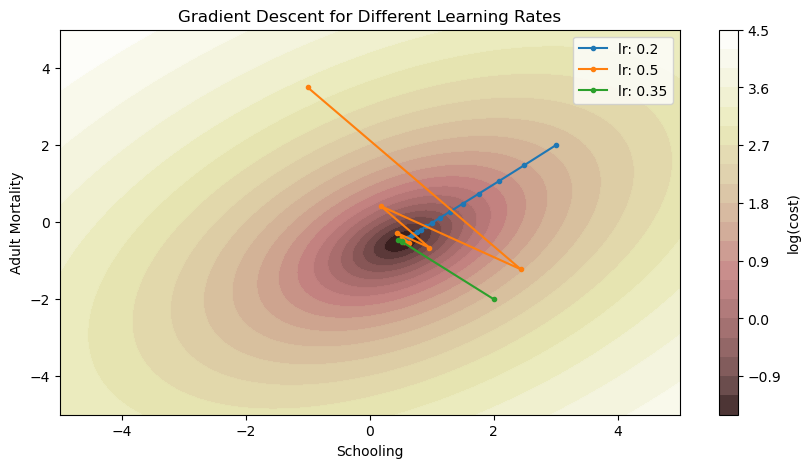

In [203]:
X_new = [df['Schooling'].values[:1000], df['Adult Mortality'].values[:1000]]
X_new = np.array(X_new).T
Xn_s, xn_mean, xn_std = standardize(X_new)
Xn_s
plt.figure(figsize=(10, 5))

gradient_descend(b1, b2, np.array([3,2]).reshape(2,1), Xn_s, y_standardized, 0.2, 100)
gradient_descend(b1, b2, np.array([-1,3.5]).reshape(2,1), Xn_s, y_standardized, 0.5, 100)
gradient_descend(b1, b2, np.array([2,-2]).reshape(2,1), Xn_s, y_standardized, 0.35, 100)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent for Different Learning Rates")
plt.xlabel("Schooling")
plt.ylabel("Adult Mortality");

## Working with destandardized data

lr: 4e-05, steps: 6


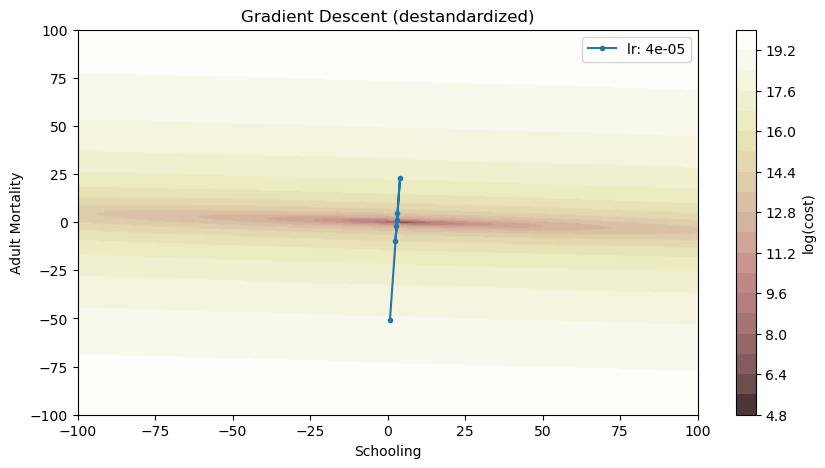

In [204]:
nb_of_bs = 201
b1 = np.linspace(-100,100, num=nb_of_bs)
b2 = np.linspace(-100, 100, num=nb_of_bs) 
X_dest = destandardize(Xn_s, xn_mean, xn_std)
y_dest = destandardize(y_standardized, y_mean, y_std)

plt.figure(figsize=(10, 5))

gradient_descend(b1, b2, np.array([3, 1]).reshape(2, 1), X_dest, y_dest, 4e-5, 5)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent (destandardized)")
plt.xlabel("Schooling")
plt.ylabel("Adult Mortality");

lr: 3e-05, steps: 11


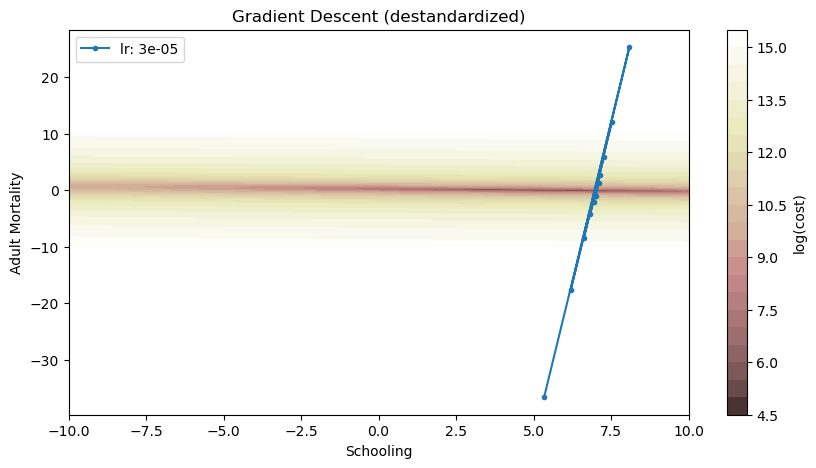

In [205]:
nb_of_bs = 201
b1 = np.linspace(-10,10, num=nb_of_bs)
b2 = np.linspace(-10, 10, num=nb_of_bs) 
X_dest = destandardize(Xn_s, xn_mean, xn_std)
y_dest = destandardize(y_standardized, y_mean, y_std)

plt.figure(figsize=(10, 5))

gradient_descend(b1, b2, np.array([7, -1]).reshape(2, 1), X_dest, y_dest, 3e-5, 10)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent (destandardized)")
plt.xlabel("Schooling")
plt.ylabel("Adult Mortality");

lr: 5e-05, steps: 6


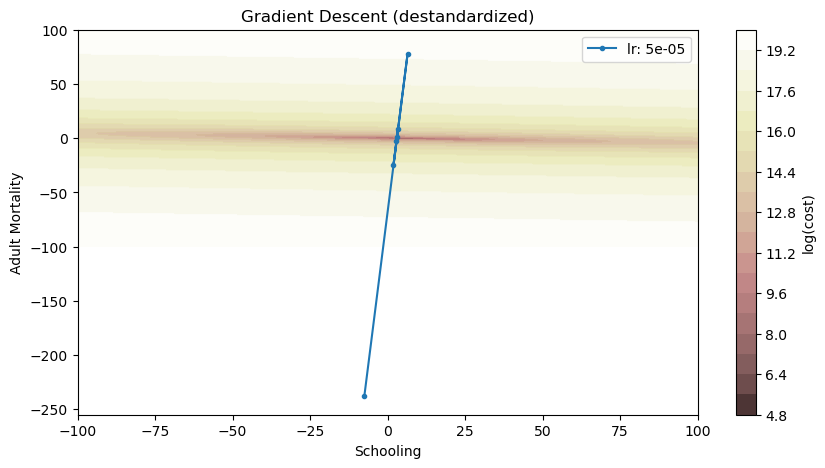

In [206]:
nb_of_bs = 201
b1 = np.linspace(-100,100, num=nb_of_bs)
b2 = np.linspace(-100, 100, num=nb_of_bs) 
X_dest = destandardize(Xn_s, xn_mean, xn_std)
y_dest = destandardize(y_standardized, y_mean, y_std)

plt.figure(figsize=(10, 5))

gradient_descend(b1, b2, np.array([3, 1]).reshape(2, 1), X_dest, y_dest, 5e-5,5)

cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.title("Gradient Descent (destandardized)")
plt.xlabel("Schooling")
plt.ylabel("Adult Mortality");

### Destandardized features made this algorithm overshoot the minimum and take huge steps in differend directions.